In [1]:
#!pip install python-mecab-ko pyLDAvis

In [2]:
import pandas as pd

In [3]:
df_11st_cholesterol = pd.read_csv('../../datasets/cholesterol_data/11st_cholesterol_no_duplicates.csv')
df_11st_cholesterol

,Unnamed: 0.1,Unnamed: 0,_id,product_name,review_writer,review_date,review_star,review_content
0,0,0,650d8884b2af41f5ca5ba6aa,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,지오됴됴,2021.03.19,5.0,배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요\n감마리놀렌산이 여성에게 좋다...
1,1,1,650d8884b2af41f5ca5ba6ab,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,ju82**,2023.07.05,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n두번째 구입입...
2,2,2,650d8884b2af41f5ca5ba6ac,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,sns2**,2023.09.20,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n유트브 보고 ...
3,3,3,650d8884b2af41f5ca5ba6ad,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,gus1***,2023.09.19,4.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 보통이에요\n약이 좀 커요....
4,4,4,650d8884b2af41f5ca5ba6ae,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,gksd******,2021.11.16,5.0,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n우선 약통 케이스도 같...
...,...,...,...,...,...,...,...,...
2878,6948,6948,65106ab5285489daa54c1d0f,레이델 폴리코사놀5 200mg x 30정 x 6박스 JJ,kim9*****,2022.06.16,5.0,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요
2879,6949,6949,65106ab5285489daa54c1d10,레이델 폴리코사놀5 200mg x 30정 x 6박스 JJ,chor******,2022.06.12,5.0,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요
2880,6950,6950,65106ab5285489daa54c1d11,레이델 폴리코사놀5 200mg x 30정 x 6박스 JJ,jjwo******,2022.06.11,5.0,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요
2881,6951,6951,65106ab5285489daa54c1d12,레이델 폴리코사놀5 200mg x 30정 x 6박스 JJ,kari******,2022.05.25,5.0,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n굿!!!!!웃!!!!


In [4]:
df_coupang_cholesterol = pd.read_csv('../../datasets/cholesterol_data/coupang_cho_no_duplicates.csv')
df_coupang_cholesterol

,Unnamed: 0.1,Unnamed: 0,_id,product_name,review_date,review_content,review_star,review_writer
0,0,0,6510ec4f1b849cc9d8ad1c08,"파이토웨이 써큐시안 블러드케어, 60정, 3개",2023.08.25,"전 몇년전에 건강검진때 당뇨 전단계라고 해서, 당시는 운동 식사조절을 해서 정상 수...",5.0,박로즈마리
1,1,1,6510ec4f1b849cc9d8ad1c09,"파이토웨이 써큐시안 블러드케어, 60정, 3개",2023.06.25,재작년에 코ㄹ나로 인해 건강검진을 받았을 당시\n백수생활로 살이 많이 찐상태로 미루...,5.0,김*현
2,2,2,6510ec4f1b849cc9d8ad1c0a,"파이토웨이 써큐시안 블러드케어, 60정, 3개",2022.11.23,"올해 5월 건강검진에서 콜레스테롤\n수치가 높게 나왔어요\nLDL 174 , 총콜레...",5.0,고*영
3,3,3,6510ec4f1b849cc9d8ad1c0b,"파이토웨이 써큐시안 블러드케어, 60정, 3개",2022.06.25,작년 건강검진을 받고 보니 중성지방(236)과 콜레스테롤\n높아서 고중성 지방 혈증...,4.0,김*현
4,4,4,6510ec4f1b849cc9d8ad1c0c,"파이토웨이 써큐시안 블러드케어, 60정, 3개",2022.12.24,"금액이 부담스러워..계속 장바구니에 넣었다가..\n확인하고, 상품평가 글을 확인하며...",5.0,정*숙
...,...,...,...,...,...,...,...,...
3383,4459,4459,6511284f1b849cc9d8ad2d73,"나우푸드 루틴 450mg 베지 캡슐, 100정, 2개",2023.07.10,타사이트보다 더 빠르게 배송됐네요\n강추합니다,5.0,반디다
3384,4460,4460,6511284f1b849cc9d8ad2d74,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",2022.07.10,가격이 만원에서 올랐노,1.0,이*영
3385,4463,4463,6511284f1b849cc9d8ad2d77,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",2019.06.10,고양이가 유미흉이가 고양이 먹이려고 샀어요,5.0,김*하
3386,4464,4464,6511284f1b849cc9d8ad2d78,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",2022.08.05,배송빠르고 너무좋았습니다~~~,5.0,임*희


In [5]:
# 11번가과 쿠팡 csv concat
df_cholesterol = pd.concat([df_11st_cholesterol,df_coupang_cholesterol], axis=0)
df_cholesterol

,Unnamed: 0.1,Unnamed: 0,_id,product_name,review_writer,review_date,review_star,review_content
0,0,0,650d8884b2af41f5ca5ba6aa,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,지오됴됴,2021.03.19,5.0,배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요\n감마리놀렌산이 여성에게 좋다...
1,1,1,650d8884b2af41f5ca5ba6ab,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,ju82**,2023.07.05,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n두번째 구입입...
2,2,2,650d8884b2af41f5ca5ba6ac,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,sns2**,2023.09.20,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n유트브 보고 ...
3,3,3,650d8884b2af41f5ca5ba6ad,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,gus1***,2023.09.19,4.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 보통이에요\n약이 좀 커요....
4,4,4,650d8884b2af41f5ca5ba6ae,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,gksd******,2021.11.16,5.0,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n우선 약통 케이스도 같...
...,...,...,...,...,...,...,...,...
3383,4459,4459,6511284f1b849cc9d8ad2d73,"나우푸드 루틴 450mg 베지 캡슐, 100정, 2개",반디다,2023.07.10,5.0,타사이트보다 더 빠르게 배송됐네요\n강추합니다
3384,4460,4460,6511284f1b849cc9d8ad2d74,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",이*영,2022.07.10,1.0,가격이 만원에서 올랐노
3385,4463,4463,6511284f1b849cc9d8ad2d77,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",김*하,2019.06.10,5.0,고양이가 유미흉이가 고양이 먹이려고 샀어요
3386,4464,4464,6511284f1b849cc9d8ad2d78,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",임*희,2022.08.05,5.0,배송빠르고 너무좋았습니다~~~


In [6]:
df_cholesterol = df_cholesterol.reset_index(drop=True)

In [7]:
df_cholesterol

,Unnamed: 0.1,Unnamed: 0,_id,product_name,review_writer,review_date,review_star,review_content
0,0,0,650d8884b2af41f5ca5ba6aa,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,지오됴됴,2021.03.19,5.0,배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요\n감마리놀렌산이 여성에게 좋다...
1,1,1,650d8884b2af41f5ca5ba6ab,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,ju82**,2023.07.05,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n두번째 구입입...
2,2,2,650d8884b2af41f5ca5ba6ac,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,sns2**,2023.09.20,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n유트브 보고 ...
3,3,3,650d8884b2af41f5ca5ba6ad,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,gus1***,2023.09.19,4.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 보통이에요\n약이 좀 커요....
4,4,4,650d8884b2af41f5ca5ba6ae,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,gksd******,2021.11.16,5.0,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n우선 약통 케이스도 같...
...,...,...,...,...,...,...,...,...
6266,4459,4459,6511284f1b849cc9d8ad2d73,"나우푸드 루틴 450mg 베지 캡슐, 100정, 2개",반디다,2023.07.10,5.0,타사이트보다 더 빠르게 배송됐네요\n강추합니다
6267,4460,4460,6511284f1b849cc9d8ad2d74,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",이*영,2022.07.10,1.0,가격이 만원에서 올랐노
6268,4463,4463,6511284f1b849cc9d8ad2d77,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",김*하,2019.06.10,5.0,고양이가 유미흉이가 고양이 먹이려고 샀어요
6269,4464,4464,6511284f1b849cc9d8ad2d78,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",임*희,2022.08.05,5.0,배송빠르고 너무좋았습니다~~~


In [8]:
# 불필요한 columns 제거 
df_cholesterol = df_cholesterol.drop(columns = ['Unnamed: 0.1','Unnamed: 0'])
df_cholesterol

,_id,product_name,review_writer,review_date,review_star,review_content
0,650d8884b2af41f5ca5ba6aa,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,지오됴됴,2021.03.19,5.0,배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요\n감마리놀렌산이 여성에게 좋다...
1,650d8884b2af41f5ca5ba6ab,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,ju82**,2023.07.05,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n두번째 구입입...
2,650d8884b2af41f5ca5ba6ac,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,sns2**,2023.09.20,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n유트브 보고 ...
3,650d8884b2af41f5ca5ba6ad,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,gus1***,2023.09.19,4.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 보통이에요\n약이 좀 커요....
4,650d8884b2af41f5ca5ba6ae,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,gksd******,2021.11.16,5.0,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n우선 약통 케이스도 같...
...,...,...,...,...,...,...
6266,6511284f1b849cc9d8ad2d73,"나우푸드 루틴 450mg 베지 캡슐, 100정, 2개",반디다,2023.07.10,5.0,타사이트보다 더 빠르게 배송됐네요\n강추합니다
6267,6511284f1b849cc9d8ad2d74,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",이*영,2022.07.10,1.0,가격이 만원에서 올랐노
6268,6511284f1b849cc9d8ad2d77,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",김*하,2019.06.10,5.0,고양이가 유미흉이가 고양이 먹이려고 샀어요
6269,6511284f1b849cc9d8ad2d78,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",임*희,2022.08.05,5.0,배송빠르고 너무좋았습니다~~~


### 전처리
##### 결측치 확인

In [9]:
df_cholesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6271 entries, 0 to 6270
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             6271 non-null   object 
 1   product_name    6271 non-null   object 
 2   review_writer   6271 non-null   object 
 3   review_date     6271 non-null   object 
 4   review_star     6271 non-null   float64
 5   review_content  6271 non-null   object 
dtypes: float64(1), object(5)
memory usage: 294.1+ KB


In [10]:
df_cholesterol.isnull().sum()

_id               0
product_name      0
review_writer     0
review_date       0
review_star       0
review_content    0
dtype: int64

In [11]:
# index=None 사용하여 csv 저장
df_cholesterol.to_csv('../../datasets/cholesterol_data/cholesterol_reivews.csv', index=None)

In [12]:
df_cholesterol = pd.read_csv('../../datasets/cholesterol_data/cholesterol_reivews.csv')
df_cholesterol

,_id,product_name,review_writer,review_date,review_star,review_content
0,650d8884b2af41f5ca5ba6aa,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,지오됴됴,2021.03.19,5.0,배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요\n감마리놀렌산이 여성에게 좋다...
1,650d8884b2af41f5ca5ba6ab,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,ju82**,2023.07.05,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n두번째 구입입...
2,650d8884b2af41f5ca5ba6ac,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,sns2**,2023.09.20,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n유트브 보고 ...
3,650d8884b2af41f5ca5ba6ad,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,gus1***,2023.09.19,4.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 보통이에요\n약이 좀 커요....
4,650d8884b2af41f5ca5ba6ae,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,gksd******,2021.11.16,5.0,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n우선 약통 케이스도 같...
...,...,...,...,...,...,...
6266,6511284f1b849cc9d8ad2d73,"나우푸드 루틴 450mg 베지 캡슐, 100정, 2개",반디다,2023.07.10,5.0,타사이트보다 더 빠르게 배송됐네요\n강추합니다
6267,6511284f1b849cc9d8ad2d74,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",이*영,2022.07.10,1.0,가격이 만원에서 올랐노
6268,6511284f1b849cc9d8ad2d77,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",김*하,2019.06.10,5.0,고양이가 유미흉이가 고양이 먹이려고 샀어요
6269,6511284f1b849cc9d8ad2d78,"나우푸드 루틴 450mg 베지 캡슐, 100정, 1개",임*희,2022.08.05,5.0,배송빠르고 너무좋았습니다~~~


In [13]:
# review_content 전체 내용확인 
df_cholesterol['review_content'].value_counts().index.tolist()

['배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요',
 '유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요',
 '가격 괜찮네요 배송 보통이에요',
 '배송 보통이에요 성능 보통이에요 유통기한 보통이에요',
 '가격 싸게 샀어요 배송 빨라요',
 '가격 괜찮네요 배송 빨라요',
 '배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요',
 '유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 보통이에요',
 '배송 보통이에요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요',
 '배송 빨라요 성능 보통이에요 유통기한 보통이에요',
 '배송 빨라요 성능 성능이 뛰어나요 유통기한 보통이에요',
 '배송 보통이에요 성능 성능이 뛰어나요 유통기한 보통이에요',
 '유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요',
 '성능 보통이에요 유통기한 보통이에요',
 '유통기한 보통이에요 포장상태 보통이에요 효과 보통이에요',
 '건강검진에서 콜레스테롤 수치가 높게 나와서 관리해보ㅇ려구 구매했어요\n혈압도 조금 높아서 겸사겸사 효과 있대서 기대하고있습니다.',
 '건강검진에사 콜레스테롤과 혈압이 높아서 관리가 필요하다고 해서 혈압 건강기능식품을 찾던중 연세대학교 세브란스케어에서 민들었다고 해서 구매했습니다. 일반 건강기능식품이 아닌 식약처에서 건강기능을 인정한 건강기능식품이라고 하니 믿음이 갔고 연세대학교 세브란스와 한미양행 둘다 큰기업이라 무조건 좋을거라 구매했습니다. 복용 후 5일이 되었지만 기분 탓인지 기능 탓인지 화장실에서 앉아있으면 저리던 다리가 저림현상이 급격히 완화 되었고 피로누적도와 어깨 결림 현상이 줄어들었습니다. 무엇보다 코엔자임, 바나바잎. 아연 영양제를 따로 따로 먹고 있었는데 거기에 홍국과 은행잎까지 챙겨먹을 수 있어서 5가지 영양제를 1개의 영양제로 다 챙기니 좋네요! 식약처 인정 / 연세대학교 세브란스 / 한미양행 / 5가지 기능성 / 타사대비 가성비 끝판왕! 하나 구매하고 부모님까지 한개 더 구매합니다!! 강력추천

### 자연어 전처리

### 형태소 적용과 불용어 처리 (review_content)

In [14]:
df_stopwords = pd.read_excel('../../datasets/dic/stopword_list.xlsx')
df_stopwords[:5]

,stopword
0,가까스로
1,가량
2,가령
3,가민
4,가민커넥트


In [16]:
# Okt (Open Korean Text) 분석기를 사용한 이유
# Python 라이브러리: Okt는 Python용 라이브러리로 제공되며, Python 개발자들이 쉽게 통합 및 사용할 수 있습니다. Python은 데이터 과학, 자연어 처리, 웹 개발 등 다양한 분야에서 인기 있는 언어이기 때문에 Okt를 Python과 함께 사용하기 용이합니다.
# 사용자 친화적인 API: Okt는 사용자가 쉽게 이해하고 사용할 수 있는 API를 제공합니다. 간단한 코드로 한국어 텍스트를 형태소로 분석하고 처리할 수 있으며, 이는 Python의 간결하고 직관적인 문법과 잘 어울립니다.
# KoNLPy와의 통합: Okt는 KoNLPy 프로젝트의 일부로 제공되며, KoNLPy는 한국어 자연어 처리를 위한 다양한 라이브러리 및 도구를 모아놓은 패키지입니다. 따라서 Okt를 사용하면 다른 KoNLPy 도구와의 통합이 용이하며, 다양한 자연어 처리 작업에 활용할 수 있습니다.


from konlpy.tag import Okt

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()
stopwords = df_stopwords['stopword'].values

# 토크나이징 함수 정의
def tokenizer(raw, pos=["Noun","Verb","Exclamation","Adjective"], stopword=stopwords):
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅏ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
    ]

In [17]:
# tokenizer_review 확인 
df_cholesterol['tokenizer_review']= df_cholesterol['review_content'].apply(tokenizer)
df_cholesterol[:5]

,_id,product_name,review_writer,review_date,review_star,review_content,tokenizer_review
0,650d8884b2af41f5ca5ba6aa,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,지오됴됴,2021.03.19,5.0,배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요\n감마리놀렌산이 여성에게 좋다...,"[빨르다, 감마, 리놀렌산, 여성, 좋다, 다해, 초록색, 비교, 해보다, 브리, ..."
1,650d8884b2af41f5ca5ba6ab,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,ju82**,2023.07.05,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n두번째 구입입...,"[상태, 깔끔하다, 좋다, 두번째, 구입, 월경, 증후군, 구입, 모르다, 영향, ..."
2,650d8884b2af41f5ca5ba6ac,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,sns2**,2023.09.20,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n유트브 보고 ...,"[상태, 깔끔하다, 좋다, 유트브, 구매, 피부, 염증, 좋다, 판매, 답글, 판매..."
3,650d8884b2af41f5ca5ba6ad,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,gus1***,2023.09.19,4.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 보통이에요\n약이 좀 커요....,"[상태, 깔끔하다, 크다, 모르다, 판매, 답글, 판매, 안녕하다, 고객, 브리, ..."
4,650d8884b2af41f5ca5ba6ae,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,gksd******,2021.11.16,5.0,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n우선 약통 케이스도 같...,"[빨르다, 뛰어나다, 케이스, 보내다, 달라, 확인, 보내다, 총알, 알약, 크기,..."


In [18]:
sentence = '가갸거겨고교구규그기 나냐너녀노뇨누뉴느니 다댜더뎌도됴두듀드디 라랴러려로료루류르리 마먀머며모묘무뮤므미 바뱌버벼보뵤부뷰브비 사샤서셔소쇼수슈스시 아야어여오요우유으이 가갸거겨고교구규그기 나냐너녀노뇨누뉴느니 다댜더뎌도됴두듀드디 라랴러려로료루류르리 마먀머며모묘무뮤므미 바뱌버벼보뵤부뷰브비 사샤서셔소쇼수슈스시 아야어여오요우유으이 가갸거겨고교구규그기 나냐너녀노뇨누뉴느니 다댜더뎌도됴두듀드디 라랴러려로료루류르리 마먀머며모묘무뮤므미 바뱌버벼보뵤부뷰브비 사샤서셔소쇼수슈스시 아야어여오요우유으이'

In [19]:
okt.morphs(sentence)

['가갸거겨',
 '고교',
 '구',
 '규',
 '그',
 '기',
 '나냐',
 '너',
 '녀노뇨누뉴',
 '느니',
 '다',
 '댜',
 '더뎌도',
 '됴두듀드',
 '디',
 '라',
 '랴러려로료루류르',
 '리',
 '마',
 '먀머며모묘무뮤므',
 '미',
 '바',
 '뱌버벼보뵤부뷰브',
 '비',
 '사샤',
 '서셔',
 '소쇼',
 '수',
 '슈',
 '스시',
 '아야',
 '어',
 '여',
 '오',
 '요',
 '우유',
 '으이',
 '가갸거겨',
 '고교',
 '구',
 '규',
 '그',
 '기',
 '나냐',
 '너',
 '녀노뇨누뉴',
 '느니',
 '다',
 '댜',
 '더뎌도',
 '됴두듀드',
 '디',
 '라',
 '랴러려로료루류르',
 '리',
 '마',
 '먀머며모묘무뮤므',
 '미',
 '바',
 '뱌버벼보뵤부뷰브',
 '비',
 '사샤',
 '서셔',
 '소쇼',
 '수',
 '슈',
 '스시',
 '아야',
 '어',
 '여',
 '오',
 '요',
 '우유',
 '으이',
 '가갸거겨',
 '고교',
 '구',
 '규',
 '그',
 '기',
 '나냐',
 '너',
 '녀노뇨누뉴',
 '느니',
 '다',
 '댜',
 '더뎌도',
 '됴두듀드',
 '디',
 '라',
 '랴러려로료루류르',
 '리',
 '마',
 '먀머며모묘무뮤므',
 '미',
 '바',
 '뱌버벼보뵤부뷰브',
 '비',
 '사샤',
 '서셔',
 '소쇼',
 '수',
 '슈',
 '스시',
 '아야',
 '어',
 '여',
 '오',
 '요',
 '우유',
 '으이']

In [20]:
type(df_cholesterol['tokenizer_review']) # series:리스트 형식 

pandas.core.series.Series

In [21]:
# !pip install wordcloud

In [22]:
from wordcloud import WordCloud

In [23]:
morphs_list = df_cholesterol['tokenizer_review'].tolist()

In [24]:
type(morphs_list)

list

In [25]:
from collections import Counter
# 리스트의 리스트인 morphs_list를 하나의 리스트로 풀어줌
flatten_morphs_list = [morph for sublist in morphs_list for morph in sublist]
nouns_count = Counter(flatten_morphs_list)

In [26]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white')
wordCloud.generate_from_frequencies(nouns_count)

In [27]:
# 빈도
wordCloud.words_

{'좋다': 1.0,
 '오메가': 0.6957131722525332,
 '제품': 0.6034294621979736,
 '구매': 0.4936866718628215,
 '건강': 0.4441153546375682,
 '도움': 0.4060795011691348,
 '개선': 0.34138737334372565,
 '꾸준하다': 0.3353078721745908,
 '콜레스테롤': 0.3304754481683554,
 '복용': 0.3094310210444271,
 '섭취': 0.308651597817615,
 '빨르다': 0.2568978955572876,
 '가격': 0.2508183943881528,
 '양제': 0.2358534684333593,
 '캡슐': 0.2049883086515978,
 '높다': 0.1985970381917381,
 '수치': 0.1954793452844895,
 '뛰어나다': 0.19002338269680435,
 '혈압': 0.17973499610288388,
 '후기': 0.17069368667186283,
 '비타민': 0.1700701480904131,
 '관리': 0.1622759158222915,
 '구입': 0.16165237724084178,
 '크다': 0.16087295401402962,
 '폴리코사놀': 0.15900233826968044,
 '많다': 0.15557287607170694,
 '먹기': 0.15167575993764615,
 '주문': 0.15120810600155885,
 '늘다': 0.14980514419329696,
 '아니다': 0.14715510522213562,
 '혈행': 0.14434918160561186,
 '혈관': 0.13031956352299298,
 '성분': 0.12595479345284488,
 '식품': 0.11644583008573656,
 '알약': 0.11332813717848791,
 '그렇다': 0.11301636788776305,
 '크기': 0.11

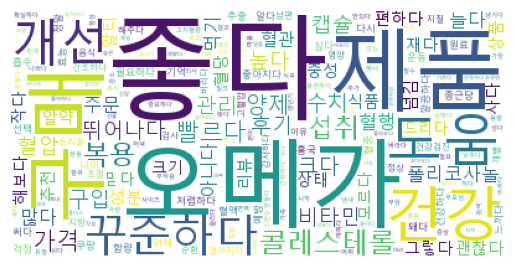

In [28]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

### 유사어 대치

In [29]:
df_replace_list = pd.read_excel('../datasets/replace_list.xlsx')
df_replace_list[:3]

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/replace_list.xlsx'

In [ ]:
type(df_replace_list)

In [ ]:
type(df_cholesterol['tokenizer_review'])

In [ ]:
def replace_word(tokenizer_review):
    try:
        for i in range(len(df_replace_list)):
            before_replacement = df_replace_list.loc[i, 'before_replacement']
            after_replacement = df_replace_list.loc[i, 'after_replacement']
            # 각 토큰을 문자열로 변환하고 다시 조인
            tokenizer_review_str = ' '.join(map(str, tokenizer_review))
            # 치환할 단어가 있는 경우에만 데이터 치환 수행
            if before_replacement in tokenizer_review_str:
                tokenizer_review_str = tokenizer_review_str.replace(before_replacement, after_replacement)
        return tokenizer_review_str
    except Exception as e:
        print(f"Error 발생 / 에러명: {e}")
        return tokenizer_review  # 에러 발생 시 원래 데이터 그대로 반환

df_cholesterol['replaced_review'] = df_cholesterol['tokenizer_review'].apply(replace_word)
df_cholesterol[:2]


In [ ]:
df_cholesterol.to_csv('../datasets/choleste_preprocess_reviews.csv')

### 부정과 긍정 댓글 분리

In [ ]:
# review_star 부정과 긍정 댓글 분리 
condition_positive = df_cholesterol['review_star'] >= 3  # 긍정
condition_negative = df_cholesterol['review_star'] < 3  # 부정

In [ ]:
df_review_positive = df_cholesterol[condition_positive]
df_review_negative = df_cholesterol[condition_negative]

In [ ]:
df_review_positive[:3]

In [ ]:
df_review_negative[:3]

In [ ]:
df_review_negative.info()

In [ ]:
df_review_positive.info()

In [ ]:
df_review_negative.dropna(inplace=True)
df_review_positive = df_review_positive.dropna()

In [ ]:
df_review_negative.info()

In [ ]:
df_review_positive.info()

### 긍정, 부정으로 전처리한 것을 CSV 파일로 저장

In [ ]:
df_review_positive.to_csv('../datasets/cholesterolreview_positive.csv')
df_review_negative.to_csv('../datasets/cholesterolreview_negative.csv')